# IMPORT ALL THE NECCESSORY LIBRATRIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


To read the given dataset as a dataframe we need to import pandas ,and for visualizations we need matplotlib and seaborn .

# READ THE DATASET

In [2]:
train_loan=pd.read_csv('/content/train_loan.csv')
df=train_loan.copy()

# DISPLAY THE FIRST 5 COLUMNS OF THE DATASET

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Dependents']

,Dependents
0,0
1,1
2,0
3,0
4,0
...,...
609,0
610,3+
611,1
612,2


Here column dependents is object type but it is actually numerical so we need to conver it into numerical type

In [5]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

Here actually numbers are stored as strings ,and there is  3+ with 3,we need to replace this and type convert to numerical type

In [6]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [7]:
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')


In [8]:
df['Dependents'].dtype

dtype('float64')

Here  I encoded  "Dependent" column from object  column into numerical column

# IDENTIFY THE SHAPE OF THE GIVEN DATASET,NO.OF ROWS AND COLUMNS

In [9]:
df.shape

(614, 13)

The given dataset consists of 614 rows and 13 columns

# IDENTIFY THE COLUMNS IN THE DATA

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Identify the datatype of each column

In [11]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,float64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


# SUMMARY OF THE DATASET

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


# STATISTICS OF ALL THE NUMERICAL COLUMNS

In [13]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


# STATISTICS OF CATEGORICAL COLUMN

In [14]:
df.describe(include='object')

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,LP002990,Male,Yes,Graduate,No,Semiurban,Y
freq,1,489,398,480,500,233,422


REMOVE DUPLICATES

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df.info()#check the info of data after duplicates removal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


This means there was no duplicates row present.info of df after and before applying duplicate removal step is same .

# MISSING VALUES IN EACH COLUMN

In [17]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


out of the total 13 columns 7 columns have missing values


# MISSING VALUE HANDLING


*  CATEGORICAL COLUMNS ...FILL THE MISSING VALUES WITH MODE
*  NUMERICAL COLUMNS ----FILL WITH MEAN OR MEDIAN BASED ON THE DISTRIBUTION



In [18]:
#IDENTIFY THE CATEGORICAL COLUMNS=> COLUMNS WITH DATATYPE 'object'
cat_cols=df.select_dtypes(include='object').columns


In [19]:
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
#identify the numerical columns==>of dtype='int','float'
num_cols=df.select_dtypes(include=['int','float']).columns

In [21]:
num_cols

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

DISTRIBUTION OF NUMERICAL COLUMNS

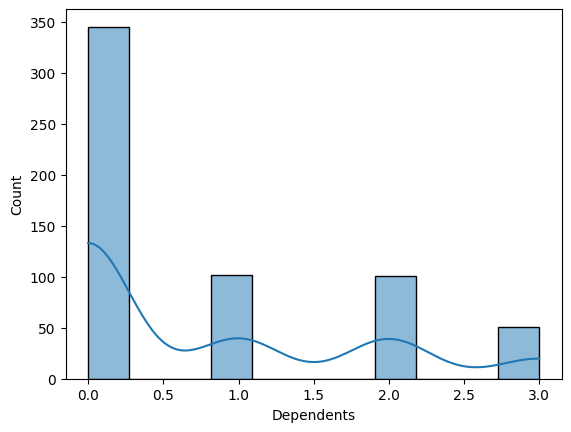

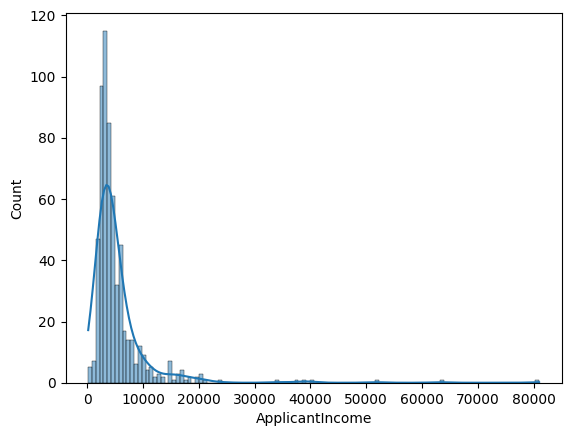

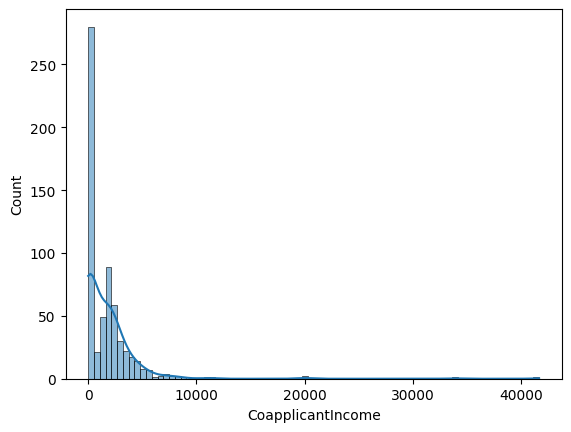

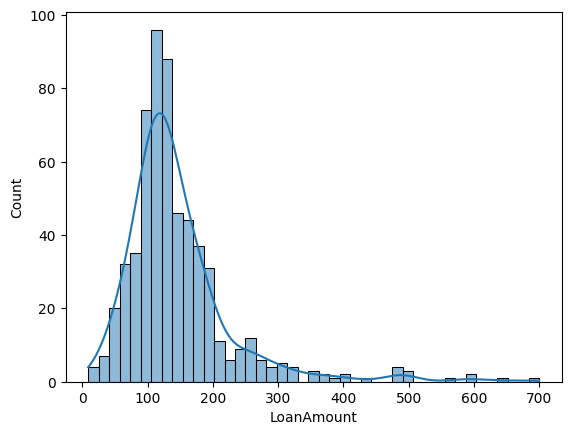

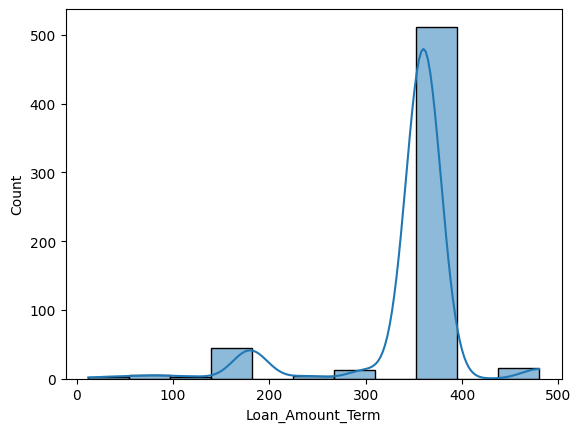

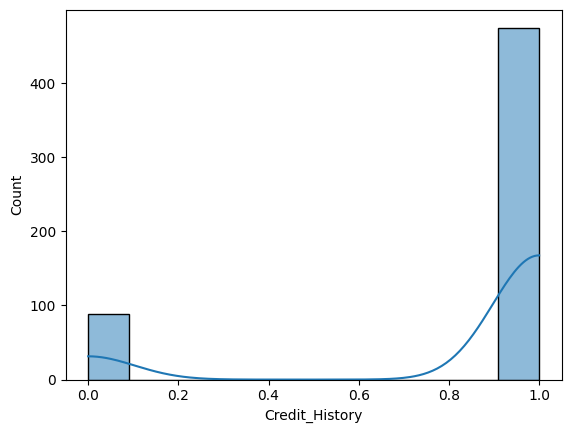

In [22]:
for cols in num_cols:
  sns.histplot(df[cols],kde=True)
  plt.show()

numerical columns here have skwed distribution .hence imputation with median will be good

FIll missing values in numerical columns with median and categorical columns with mode

In [23]:
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [24]:
df[cat_cols].isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Education,0
Self_Employed,0
Property_Area,0
Loan_Status,0


Missing values in cat columns were filled with mode

Fill missing values in numerical columns with median ,median is insensitive to outliers so filling with median will be a better option

In [25]:
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

In [26]:
df[num_cols].isnull().sum()

,0
Dependents,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [27]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


All the missing values in the datsets are removed

# OUTLIER DETECTION

BOXPLOT ----TO DETECT PRESENCE OF OUTLIERS

In [28]:
# Identify discrete numerical columns
discrete_num_cols = []
for col in num_cols:
    if len(df[col].unique()) < 20:  # Adjust threshold as needed
        discrete_num_cols.append(col)

discrete_num_cols


['Dependents', 'Loan_Amount_Term', 'Credit_History']

In [29]:
#take all contineous numerical columns from num column

cont_num = num_cols.difference(discrete_num_cols) # Use difference to get elements in num_cols but not in discrete_num_cols


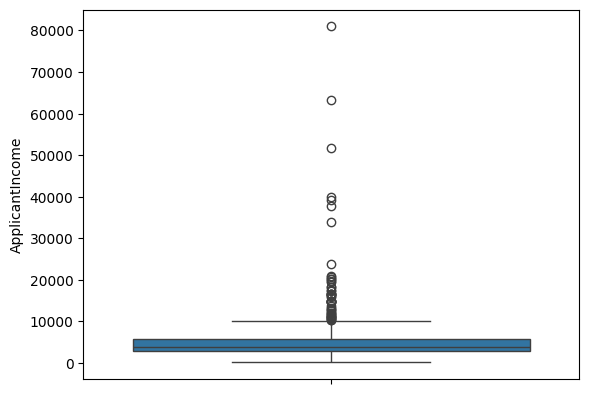

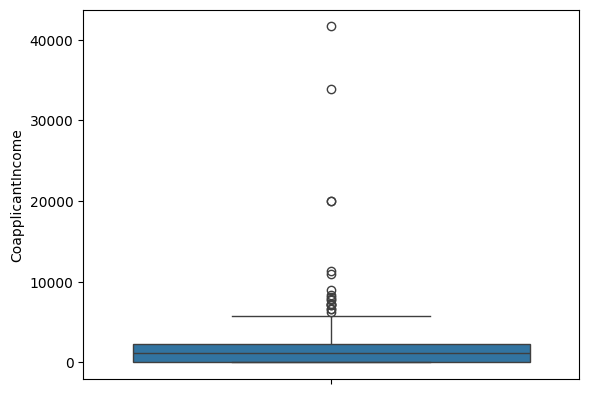

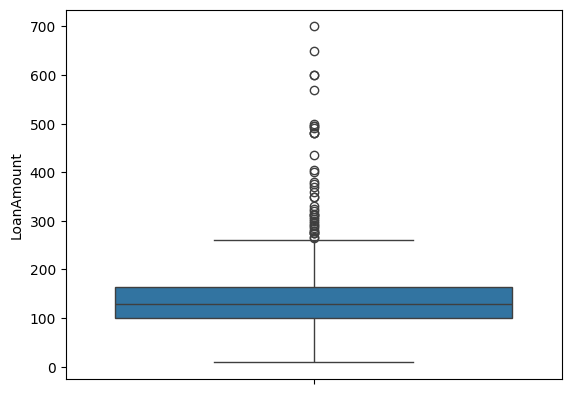

In [30]:
#boxplot of contineous numerical columns
for col in cont_num:
  sns.boxplot(df[col])
  plt.show()

All the contineous numerical columns have outliers present so we need to remove it.I will use IQR based method

In [31]:
for col in cont_num :
    Q1=np.quantile(df[col],0.25)
    Q3=np.quantile(df[col],0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers using boolean indexing
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # Drop outliers based on their index
    df.drop(outliers.index, inplace=True)

    #df = df[~df.index.isin(outliers.index)]

Here outliers are removed using IQR method.first oultiers are detected ,those values which are below the lower bound and above the upper bound are called outliers ,they are detected and using there index removed those values from the dataframe

# ENCODING

Encoding is the process of converting categorical data (text or labels) into a numerical format so that machine learning models can understand and work with them.

Most algorithms only accept numeric input, so encoding is a crucial preprocessing step.

In [32]:
df['Loan_ID'].nunique()

520

Loan_id is just an identifier ,it has no predictive value so we can remove it

In [33]:
df.drop('Loan_ID',axis=1,inplace=True)

In [34]:
cat_cols=cat_cols.drop('Loan_ID')

In [35]:
#identify binary categorical columns
binary_cols=[]
for col in cat_cols:
  if df[col].nunique()==2:
    binary_cols.append(col)

In [36]:
binary_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

#Encode binary categorical columns with label encoder .
Import label encoder from sklearn.preprocessing

Label Encoding assigns a unique integer value to each category in a column.

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in binary_cols:
  df[col]=le.fit_transform(df[col])

# One-hot encode categorical features with more than two unique values

One-hot encoding converts each category into a new column, with 1 indicating presence and 0 for absence.

It is used For nominal (non-ordinal) categorical features with more than two categories

Avoids assigning any implied order between categories

=>identify multiclass columns in the categorical columns

In [38]:
multi_cols=cat_cols.drop(binary_cols)

In [39]:
multi_cols

Index(['Property_Area'], dtype='object')

In [40]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True,dtype=int)


get_dummies is used for one hot encoding ,The drop_first=True parameter avoids multicollinearity by dropping the first category and encoding the rest.

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


All categorical columns are encoded .

#SCALING

Import  and initialize standard scaler from sklearn

StandardScaler is a preprocessing technique from scikit-learn used to standardize numerical features in a dataset.
It transforms the data in such a way that:

The mean of each feature becomes 0

The standard deviation becomes 1

Many machine learning algorithms (like Logistic Regression, SVM, KNN, and PCA) are sensitive to feature scales.

Standardizing makes training faster and more stable, especially when features vary in units or ranges.



In [42]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [43]:
num_cols

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [44]:
num_cols=num_cols.drop('Dependents')

We dont need to scale "dependents" column.its value range is 3 only .I am applying standard scaler to all other numerical columns.there is no need to apply scaling to encoded columns.

In [45]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [46]:
df[num_cols]=Scaler.fit_transform(df[num_cols])

In [47]:
df[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.033643,-0.943785,0.109491,0.265776,0.416911
1,0.327548,0.136399,0.109491,0.265776,0.416911
2,-0.555349,-0.943785,-1.451763,0.265776,0.416911
3,-0.787925,0.745256,-0.091961,0.265776,0.416911
4,1.117861,-0.943785,0.436851,0.265776,0.416911


In [48]:
df[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,520.000000,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02
mean,0.000000,1.058982e-16,-1.622634e-16,-3.006142e-16,5.465713e-17
std,1.000963,1.000963e+00,1.000963e+00,1.000963e+00,1.000963e+00
min,-2.144899,-9.437847e-01,-2.484206e+00,-5.042709e+00,-2.398593e+00
25%,-0.709006,-9.437847e-01,-5.955915e-01,2.657763e-01,4.169111e-01
50%,-0.226006,-1.724762e-02,-1.641642e-02,2.657763e-01,4.169111e-01
75%,0.433379,6.256337e-01,6.634848e-01,2.657763e-01,4.169111e-01
max,3.375021,3.139855e+00,2.829096e+00,2.096289e+00,4.169111e-01


Here after applying standard scaler mean become almost zero ans standard deviation 1.

Scaling done correctly

In [49]:
df[num_cols].dtypes

,0
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,0,1.033643,-0.943785,0.109491,0.265776,0.416911,1,0,1
1,1,1,1.0,0,0,0.327548,0.136399,0.109491,0.265776,0.416911,0,0,0
2,1,1,0.0,0,1,-0.555349,-0.943785,-1.451763,0.265776,0.416911,1,0,1
3,1,1,0.0,1,0,-0.787925,0.745256,-0.091961,0.265776,0.416911,1,0,1
4,1,0,0.0,0,0,1.117861,-0.943785,0.436851,0.265776,0.416911,1,0,1


Check the info of the dataframe after doing all these preprocessing steps

In [51]:
df.reset_index(drop=True, inplace=True)


After the removal of some rows index we need to set .

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   520 non-null    int64  
 1   Married                  520 non-null    int64  
 2   Dependents               520 non-null    float64
 3   Education                520 non-null    int64  
 4   Self_Employed            520 non-null    int64  
 5   ApplicantIncome          520 non-null    float64
 6   CoapplicantIncome        520 non-null    float64
 7   LoanAmount               520 non-null    float64
 8   Loan_Amount_Term         520 non-null    float64
 9   Credit_History           520 non-null    float64
 10  Loan_Status              520 non-null    int64  
 11  Property_Area_Semiurban  520 non-null    int64  
 12  Property_Area_Urban      520 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 52.9 KB


Null values and outliers have been removed. Categorical columns were encoded, and numerical features were scaled.